# Preprocessing

## Introduction

Preprocessing is always an important step of data analysis. In the case of soccer data, this mainly relates to the tracking data. Here we will show what kind of different preprocessing steps are available in DataBallPy and how you can run them. Before we can showcase anything, we will load in a match object.

In [3]:
import os
from databallpy import get_saved_match

match = get_saved_match(name="not_synced_match", path=os.path.join(os.getcwd(), "saved_matches"))
print(match.name)

T-70d43af2 2 - 2 T-13315f63 1980-01-01 15:00:00


```{note}
This match contains 6 minutes of a match and is fully anonimised.
```

## Filtering Data

Soccer tracking data differs in quality, but in almost all cased filtering of coordinates is preferred. Tracking data is often captured by putting video footage of the match in deep learning models. Obstruction by other players can greatly influence the quality of the data. This is especially the case for the ball (the small ball is often obstructed) and in crowded situations (e.g. corner-kicks). For this situation we will apply a filter over the ball.

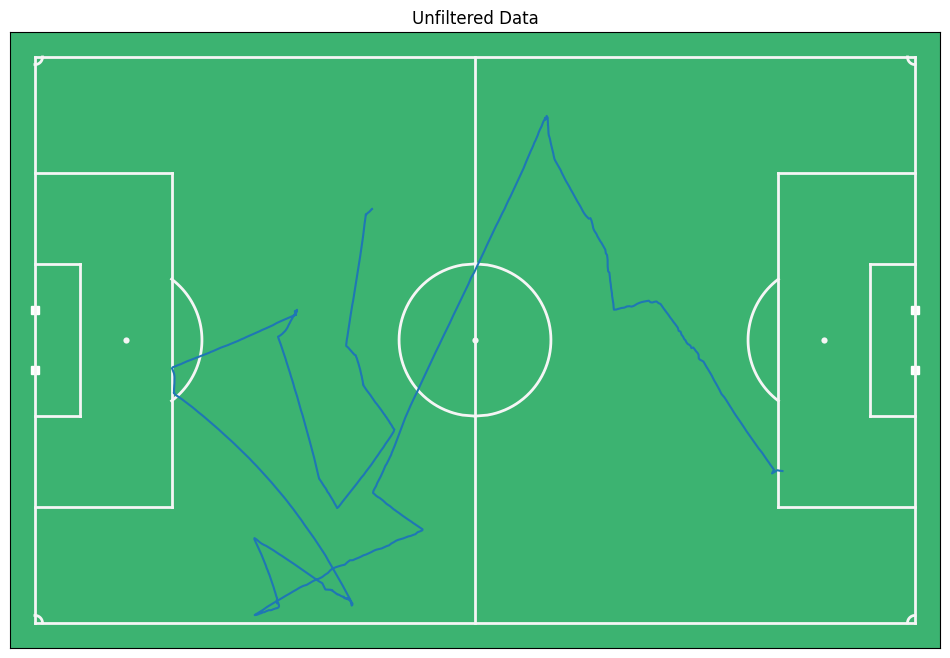

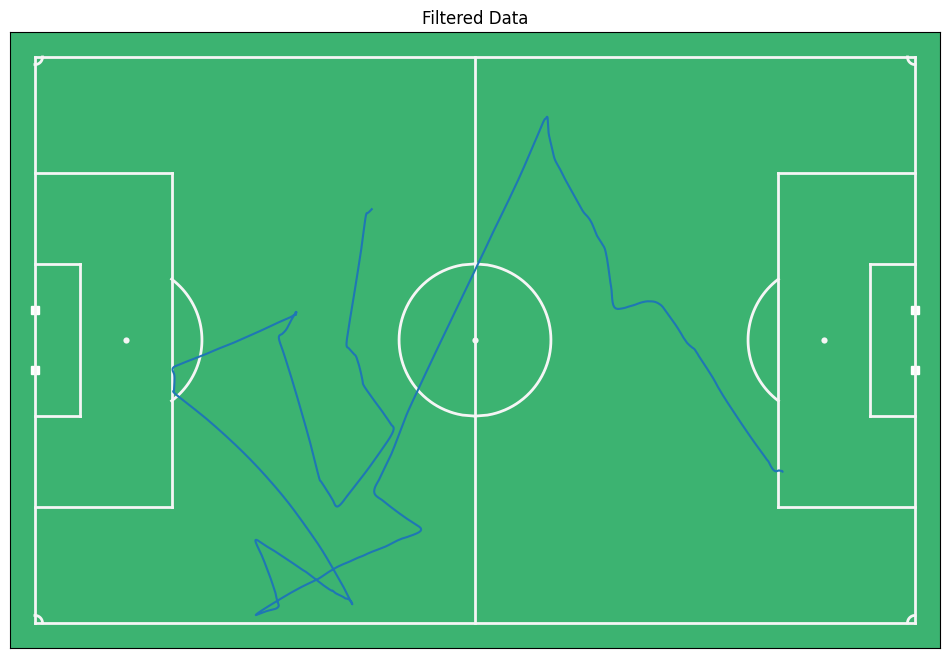

In [18]:
import matplotlib.pyplot as plt
from databallpy.visualize import plot_soccer_pitch
from databallpy.utils.filters import filter_data

ball_x, ball_y = match.tracking_data["ball_x"].values, match.tracking_data["ball_y"].values

ball_x_filtered = filter_data(ball_x.copy(), filter_type="savitzky_golay", window_length=12, polyorder=2)
ball_y_filtered = filter_data(ball_y.copy(), filter_type="savitzky_golay", window_length=12, polyorder=2)

fig, ax1 = plot_soccer_pitch()
fig, ax2 = plot_soccer_pitch()
ax1.plot(ball_x[2000:3000], ball_y[2000:3000], label="unfiltered")
ax2.plot(ball_x_filtered[2000:3000], ball_y_filtered[2000:3000], label="filtered")
ax1.set_title("Unfiltered Data")
ax2.set_title("Filtered Data")
plt.show()

```{note}
Filtering of this specific data might not be necessary depending on the specific needs. The high number of frames chosen here is only to showcase how the filtering works, not an advice on how many frames you should filter your data on.
```

As you can see, the filtered data looks less noisy. Currently, two filter types are supported: "savitzkey_golay" and "moving_average". The window_length is the number of frames over which to filter, and should be adapted based on you specific data and sample rate. The polyorder argument is only used if "savitzkey_golay" is chosen as filter type.